In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("data/train.csv")

In [ ]:
df.columns

In [ ]:
df.iloc[0]

In [ ]:
def normalize(string_to_replace):
    removed_semicolon = string_to_replace.replace(';', ',')
    removed_double = removed_semicolon.replace('"', '')
    return removed_double.split(',')

In [ ]:
columns_attr = normalize(df.columns[0])
df_new = pd.DataFrame(columns=columns_attr)
print(df_new)

In [ ]:
for i in range(df.shape[0]):
    new_list = normalize(df.iloc[i][0])
    df_new.loc[i] = new_list
    print(i)



In [ ]:
df_new.to_csv("data/train_new.csv")

In [3]:
df_new = pd.read_csv("data/train_new.csv")

In [4]:
df_new.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   job         45211 non-null  object
 3   marital     45211 non-null  object
 4   education   45211 non-null  object
 5   default     45211 non-null  object
 6   balance     45211 non-null  int64 
 7   housing     45211 non-null  object
 8   loan        45211 non-null  object
 9   contact     45211 non-null  object
 10  day         45211 non-null  int64 
 11  month       45211 non-null  object
 12  duration    45211 non-null  int64 
 13  campaign    45211 non-null  int64 
 14  pdays       45211 non-null  int64 
 15  previous    45211 non-null  int64 
 16  poutcome    45211 non-null  object
 17  y           45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [6]:
for col in df_new.columns:
    print(df_new[col].value_counts())

2047     1
44287    1
36187    1
34138    1
40281    1
        ..
33445    1
35492    1
41633    1
43680    1
0        1
Name: Unnamed: 0, Length: 45211, dtype: int64
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218  

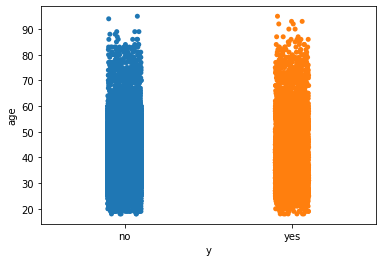

In [7]:
sns.stripplot(x="y", y="age", data=df_new, jitter=True)
plt.show()

In [8]:
df_new.age = pd.to_numeric(df_new.age)

In [9]:
numeric_col = ['age', 'balance','duration','day','campaign','pdays','previous']
string_col = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

In [10]:
for col in numeric_col:
    df_new[col] = pd.to_numeric(df_new[col])

In [11]:
for col in string_col:
    df_new[col] = df_new[col].astype(str)

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   job         45211 non-null  object
 3   marital     45211 non-null  object
 4   education   45211 non-null  object
 5   default     45211 non-null  object
 6   balance     45211 non-null  int64 
 7   housing     45211 non-null  object
 8   loan        45211 non-null  object
 9   contact     45211 non-null  object
 10  day         45211 non-null  int64 
 11  month       45211 non-null  object
 12  duration    45211 non-null  int64 
 13  campaign    45211 non-null  int64 
 14  pdays       45211 non-null  int64 
 15  previous    45211 non-null  int64 
 16  poutcome    45211 non-null  object
 17  y           45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [13]:
df_new = df_new.drop(["Unnamed: 0"], axis=1)

In [14]:
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [15]:
df_new.duration.unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [16]:
categorical_attr = ["job",'marital','education','default','housing','loan','contact','day','poutcome','pdays','previous','campaign', 'y'] # month is also a categorical variable but I will process it later
# pdays is categorical variable because pdays includes -1, which is known as 'null' or 'unknown' value

In [17]:
for col in categorical_attr:
    distinct_attr = df_new[col].unique()
    df_new[col] = df_new[col].apply(lambda x: list(distinct_attr).index(x) )


In [18]:
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,0,may,261,0,0,0,0,0
1,44,1,1,1,0,29,0,0,0,0,may,151,0,0,0,0,0
2,33,2,0,1,0,2,0,1,0,0,may,76,0,0,0,0,0
3,47,3,0,2,0,1506,0,0,0,0,may,92,0,0,0,0,0
4,33,4,1,2,0,1,1,0,0,0,may,198,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,23,nov,977,2,0,0,0,1
45207,71,5,2,3,0,1729,1,0,1,23,nov,456,1,0,0,0,1
45208,72,5,0,1,0,5715,1,0,1,23,nov,1127,3,80,1,3,1
45209,57,3,0,1,0,668,1,0,2,23,nov,508,4,0,0,0,0


In [19]:
df_new.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [20]:
look_up = {'aug': 8, 'nov': 11, 'jun': 6, 'apr': 4, 'jul': 7,'jan':1, 'feb':2,
            'may': 5, 'oct': 10, 'mar': 3, 'sep': 9, 'dec': 12}
df_new['month'] = df_new['month'].apply(lambda x: look_up[x])

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [22]:
def plot_heatmap(df):
    plt.figure(dpi = 120,figsize= (10,8))
    mask = np.triu(np.ones_like(df.corr(),dtype = bool))
    sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
    plt.yticks(rotation = 0)
    plt.xticks(rotation = 90)
    plt.title('Correlation Heatmap')
    plt.show()

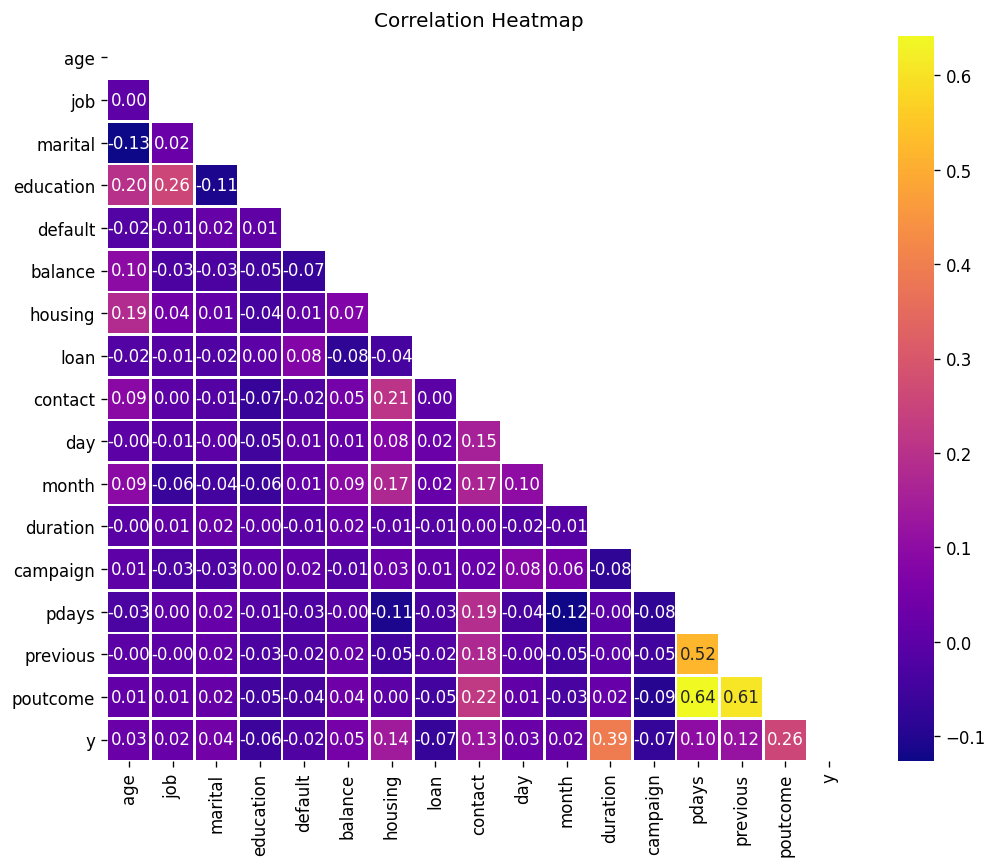

In [23]:
plot_heatmap(df_new)

In [24]:
df_new = df_new.drop(["poutcome"],axis=1)

In [25]:
df_numerical = df_new[['age','balance','duration']]

<Figure size 720x480 with 0 Axes>

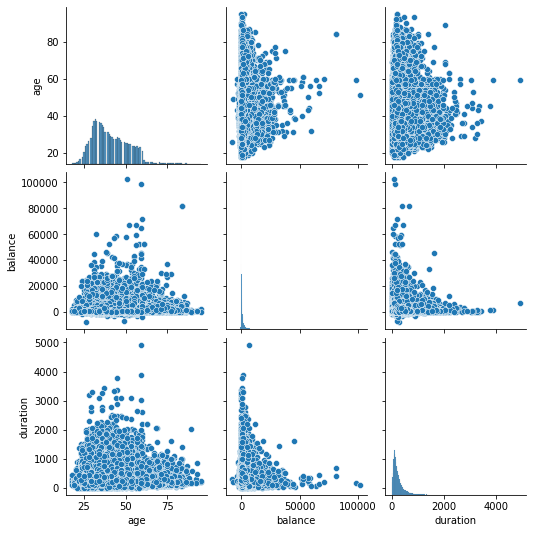

In [26]:
plt.figure(dpi=120)
sns.pairplot(df_numerical)
plt.show()

In [27]:
df_numerical.corr()

,age,balance,duration
age,1.000000,0.097783,-0.004648
balance,0.097783,1.000000,0.021560
duration,-0.004648,0.021560,1.000000


In [28]:
import stat_util
import math

In [29]:
def plot_qq(df):
    mean, var = stat_util.TrimmedMeanVar(df, p=0.01)
    std = math.sqrt(var)

    xs = [-4, 4]
    fxs, fys = stat_util.FitLine(xs, mean, std)
    plt.plot(fxs, fys, linewidth=4, color='grey')
    xs, ys = stat_util.NormalProbability(df)
    plt.plot(xs, ys)
    plt.show()


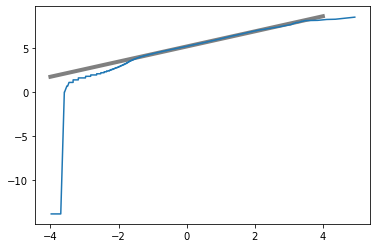

In [30]:
plot_qq(np.log(df_numerical.duration + 1e-6))

(array([3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        4.000e+00, 0.000e+00, 1.500e+01, 8.000e+01, 7.300e+01, 1.620e+02,
        1.730e+02, 2.520e+02, 3.480e+02, 3.970e+02, 4.350e+02, 4.600e+02,
        7.350e+02, 1.136e+03, 1.838e+0

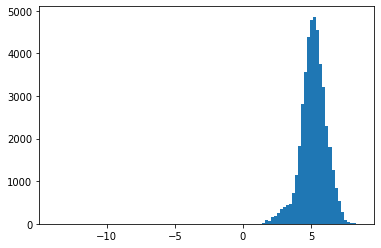

In [31]:
plt.hist(np.log(df_numerical.duration + 1e-6), bins=100)

In [49]:
def bay_logistic_reg(X, y, u = 0, theta = 1, ):
    weights = np.ones(len(np.atleast_1d(y)),)
    # set prior distribution on parameters

    intercept = np.random.normal(u, theta)
    age = np.random.normal(u, theta)
    job = np.random.normal(u, theta)
    marital = np.random.normal(u, theta)
    education = np.random.normal(u, theta)
    default = np.random.normal(u, theta)
    balance = np.random.normal(u, theta)
    housing = np.random.normal(u, theta)
    loan = np.random.normal(u, theta)
    contact = np.random.normal(u, theta) 
    day = np.random.normal(u, theta)
    month = np.random.normal(u, theta)
    duration = np.random.normal(u, theta)
    campaign = np.random.normal(u, theta)
    pdays = np.random.normal(u, theta)
    previous = np.random.normal(u, theta)
    log_duration = np.random.normal(u, theta)
    params = np.array([age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous,intercept, log_duration])
    """ 
    X : features (N, p)
    y : labels (N,)
    combined_params : prior (p,)
    """
    eps = 1e-6 
    mu = logistic_prob(X, params)
    assert mu.shape == y.shape

    # negative log likelihood
    neg_log_post = - np.dot(y.T,weights * np.log(mu + eps)) - np.dot((1. - y).T, weights * np.log(1. - mu + eps))
    print(float(neg_log_post)) # loss

    grad_log_post = np.dot(X.T,weights * (mu - y))

    # find hessian 
    S = mu * (1. - mu) * weights
    H_log_post = np.dot(X.T, X * S[:, np.newaxis])
    print(H_log_post.shape)
    hessian_inverse = np.linalg.inv(H_log_post)
    params = params - np.dot(hessian_inverse , grad_log_post)

    print(params.shape)

    return params


In [33]:
def logistic_prob(x, weights):
    trunc = 8.
    print(x.shape)
    z =  np.dot(x, weights)
    
    # truncate to avoid numerical over/underflow
    z = np.clip(z, -trunc, trunc)

    # calculate logitstic probability
    return sigmoid(z)

In [34]:
def sigmoid(z):
    return 1. /(1. + np.exp(-z))

In [35]:
df_test = df_new.drop(['y'], axis=1)

In [36]:
df_test["intercept"] = [1 for i in range(len(df_test))]

In [37]:
df_test['log_duration'] = np.log(df_test.duration + 1e-6)

In [38]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,intercept,log_duration
0,58,0,0,0,0,2143,0,0,0,0,5,261,0,0,0,1,5.564520
1,44,1,1,1,0,29,0,0,0,0,5,151,0,0,0,1,5.017280
2,33,2,0,1,0,2,0,1,0,0,5,76,0,0,0,1,4.330733
3,47,3,0,2,0,1506,0,0,0,0,5,92,0,0,0,1,4.521789
4,33,4,1,2,0,1,1,0,0,0,5,198,0,0,0,1,5.288267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,23,11,977,2,0,0,1,6.884487
45207,71,5,2,3,0,1729,1,0,1,23,11,456,1,0,0,1,6.122493
45208,72,5,0,1,0,5715,1,0,1,23,11,1127,3,80,1,1,7.027315
45209,57,3,0,1,0,668,1,0,2,23,11,508,4,0,0,1,6.230481


In [50]:
bay_logistic_reg(X=df_test.iloc[:], y = np.array(df_new.y.iloc[:].tolist()))

(45211, 17)
189532.67211608385
(17, 17)
(17,)
